   # WEEK_10 

### EDA performed on the data and the results are shown below and also at the end the final recommendation is also been written.  

In [47]:
import numpy as npy
import pandas as pan
import matplotlib.pyplot as matplt
import seaborn as sea
from IPython.core.display import display
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [48]:
full_bank = pan.read_csv('bank-full.csv', sep = ';')

In [49]:
full_bank.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [50]:
full_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
full_bank.shape

(45211, 17)

In [52]:
full_bank.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

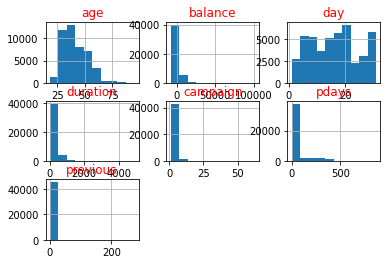

In [53]:
full_bank.hist()

In [54]:
full_bank.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [55]:
full_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [56]:
full_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [57]:
def nullVal(full_bank):
    missing_num = full_bank.isnull().sum()
    missing_percent = (100 * missing_num / len(full_bank))
    concatinated_value = pan.concat([missing_num, missing_percent], axis = 1)

    missing = concatinated_value.rename(columns = {0:"Missing ", 1:"Percent of Missing Values"})
    in_sorted_order = missing[missing.iloc[:,1]!=0].sort_values(by= 'Percent of Missing Values', ascending = False).round(1)
    print("Full Bank Data has a total of '{}' coloumns from which the '{}' coloumns are having missing values.".format(full_bank.shape[1],in_sorted_order.shape[0]))
    return in_sorted_order
missing_num = nullVal(full_bank)

Full Bank Data has a total of '17' coloumns from which the '0' coloumns are having missing values.


<AxesSubplot:>

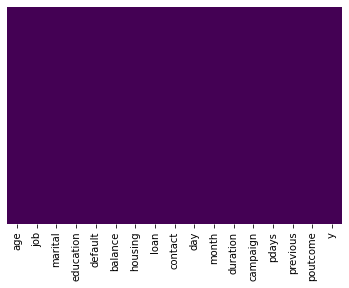

In [58]:
sea.heatmap(full_bank.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

EDA

Age vs Subscription

Text(0.5, 1.0, 'Age Vs Subscription')

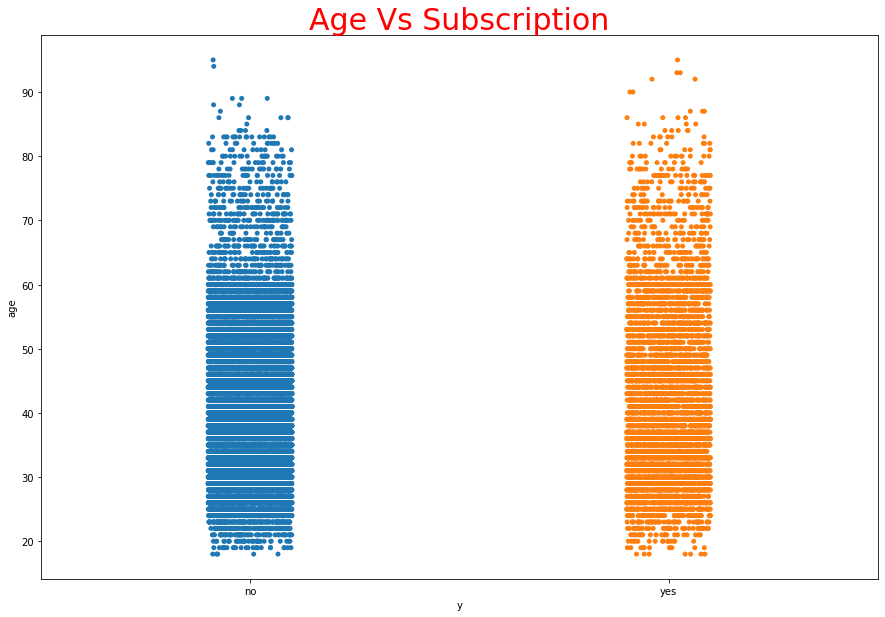

In [59]:
figure = matplt.figure(figsize=(15,10))
matplt.rcParams.update({'text.color':"red"})
sea.stripplot(x = 'y', y= 'age', data= full_bank)
matplt.title("Age Vs Subscription", fontsize=30)

More clinets are between the age of 20-50

Text(0.5, 1.0, 'Job vs Age')

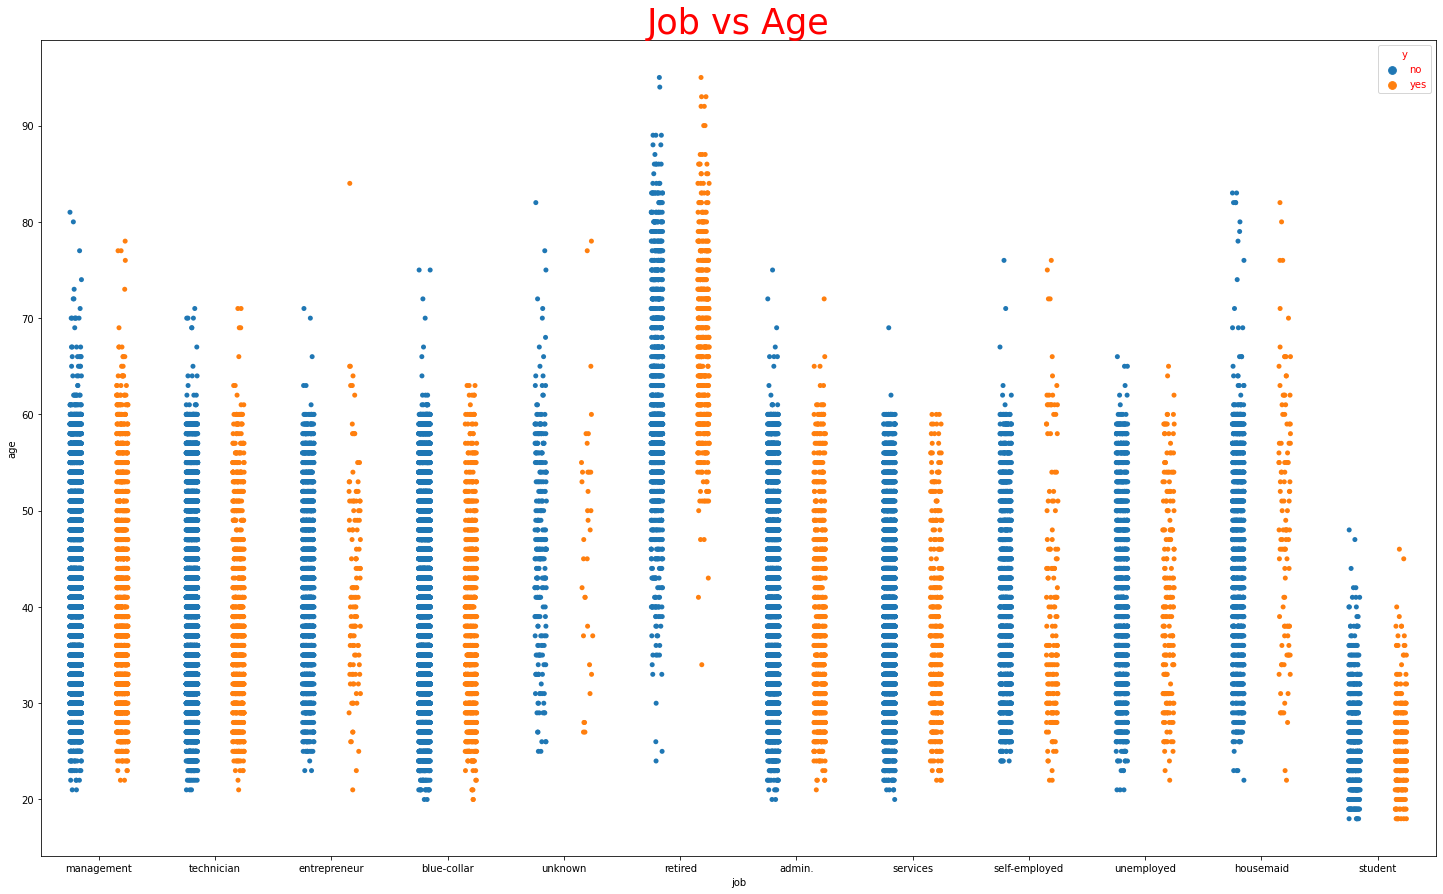

In [60]:
fig = matplt.figure(figsize=(25,15))
sea.stripplot(x='job', y= 'age',hue='y',data= full_bank, dodge= True)
matplt.rcParams.update({'text.color':"red"})
matplt.title("Job vs Age", fontsize = 35)

Retired clients are more likely to buy policy than others

In [61]:
jobVSage = full_bank.groupby(['job','y'])['age'].count().unstack()

In [62]:
jobVSage

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


Text(0.5, 1.0, 'Profession Vs Subscription')

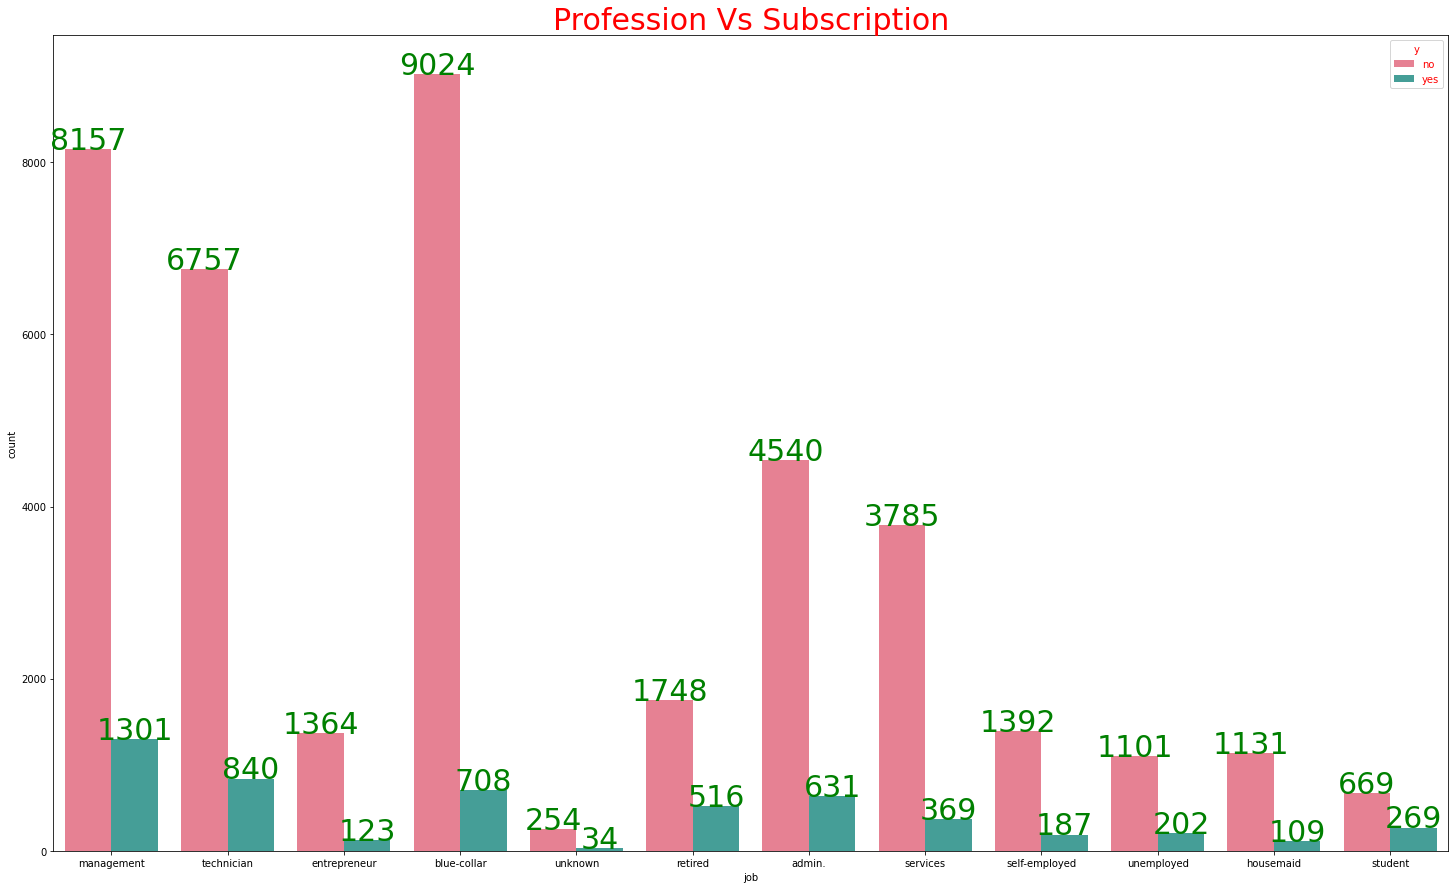

In [63]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'job', hue='y', data= full_bank, palette = "husl")
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'green',size=30)
block.set_title("Profession Vs Subscription", fontsize = 30, color= 'red')

Those who are in management section are more likely to get the policy

Matrial status vs Age

Text(0.5, 1.0, 'Marital Status vs Age')

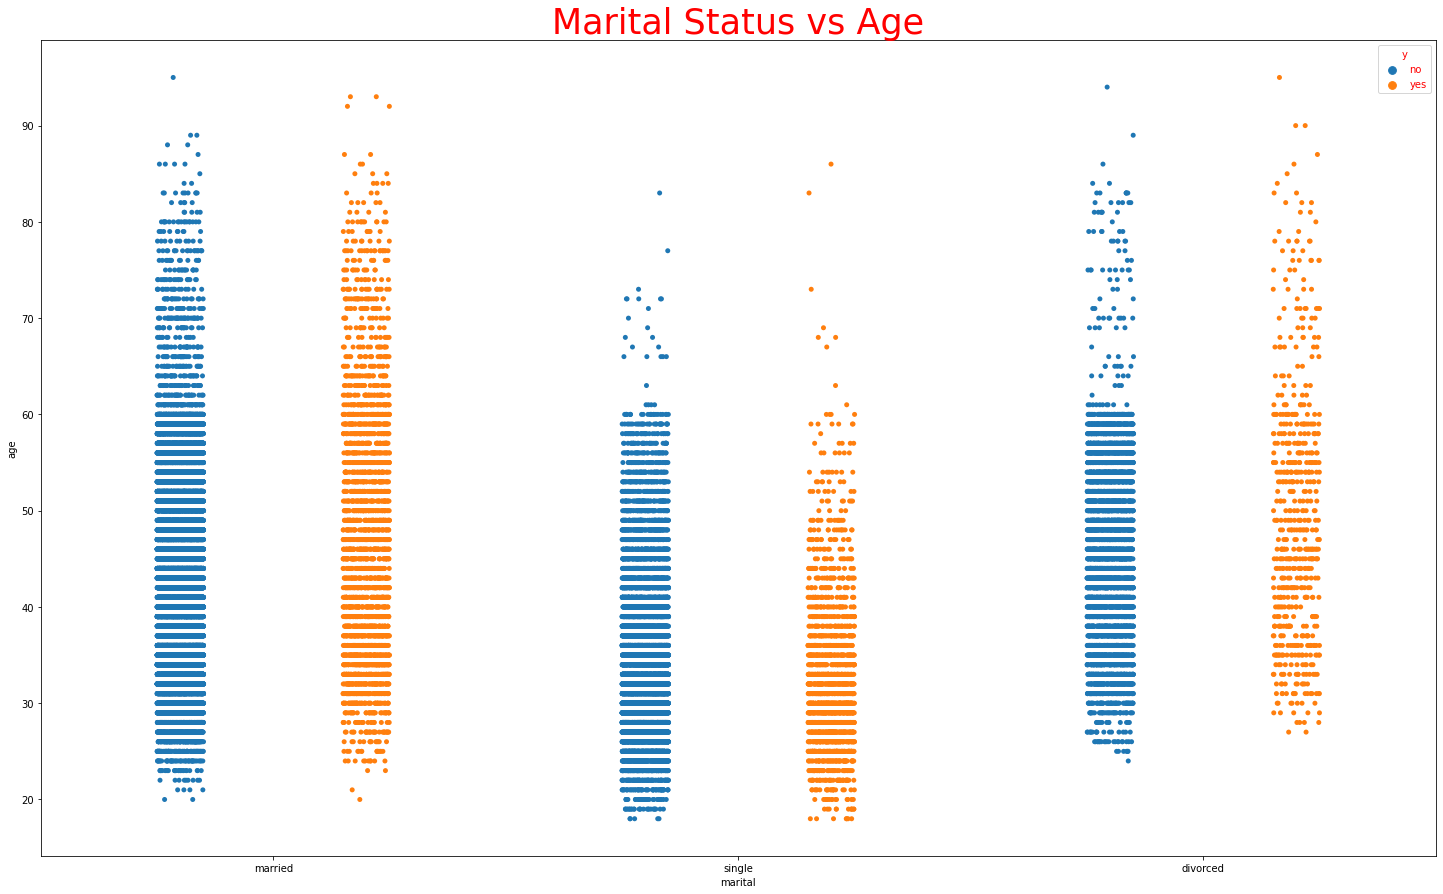

In [64]:
fig = matplt.figure(figsize=(25,15))
sea.stripplot(x='marital', y= 'age', hue ='y',data= full_bank, dodge= True)
matplt.rcParams.update({'text.color':"red"})
matplt.title("Marital Status vs Age", fontsize = 35)

Those Married are more likely to buy between the age of 60 - 80

Text(0.5, 1.0, 'Marital Status Vs Subscription')

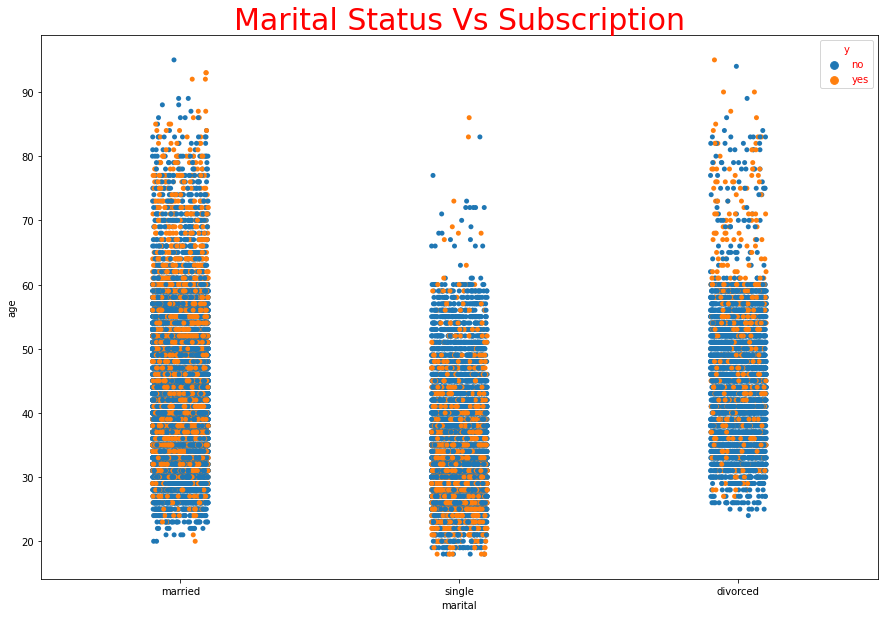

In [65]:
figure = matplt.figure(figsize=(15,10))
matplt.rcParams.update({'text.color':"red"})
sea.stripplot(x = 'marital', y= 'age',hue = 'y', data= full_bank)
matplt.title("Marital Status Vs Subscription", fontsize=30)

Default Vs Age

Text(0.5, 1.0, 'Default vs Age')

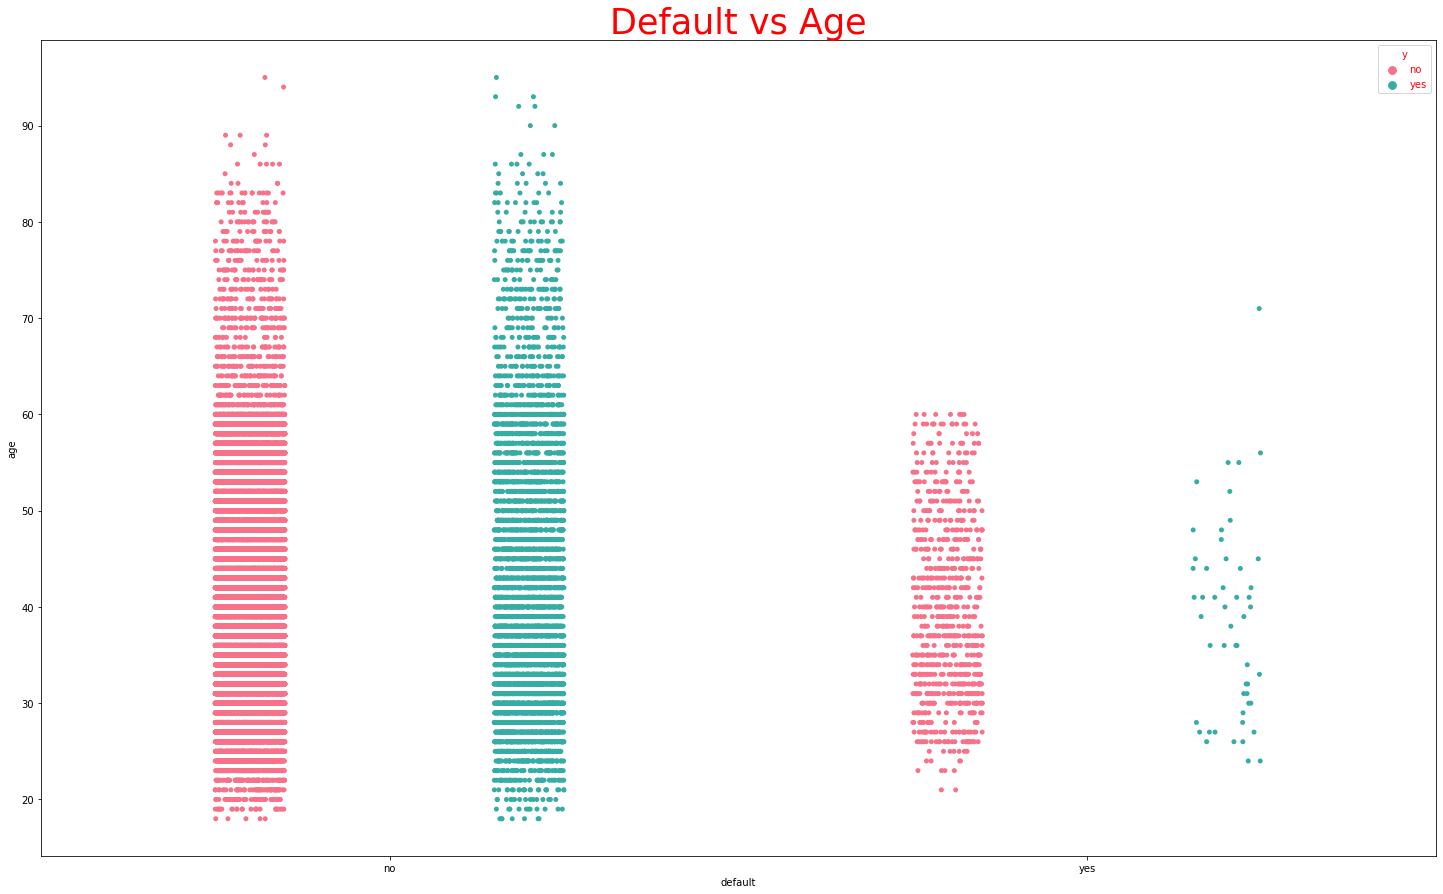

In [66]:
fig = matplt.figure(figsize=(25,15))
sea.stripplot(x='default', y= 'age', hue ='y',data= full_bank, dodge= True, palette = "husl")
matplt.rcParams.update({'text.color':"red"})
matplt.title("Default vs Age", fontsize = 35)

Default Vs Subscription

Text(0.5, 1.0, 'Default Vs Subscription')

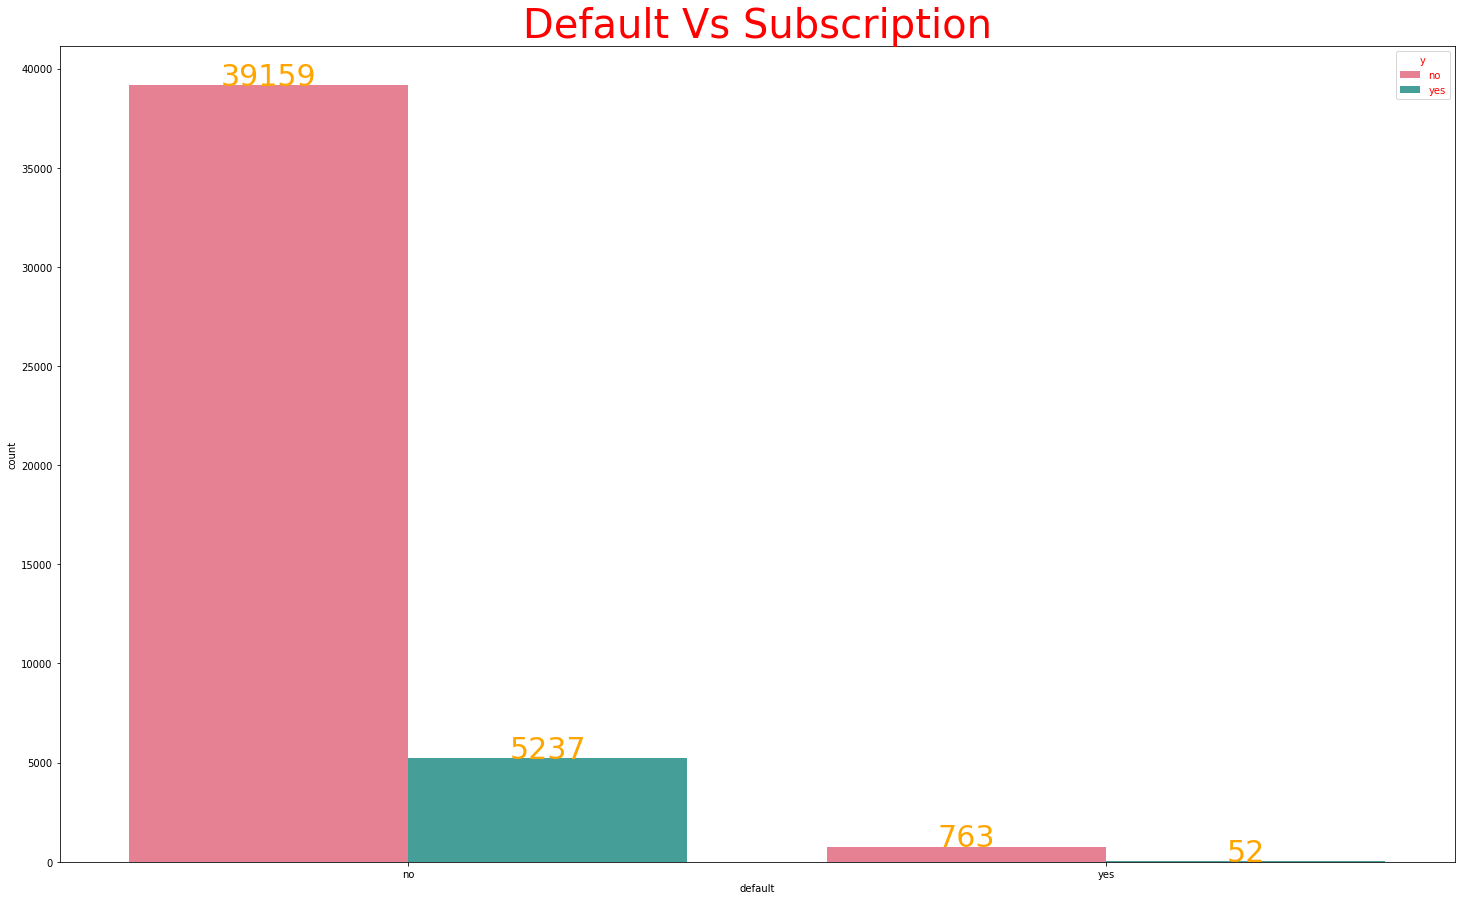

In [67]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'default', hue='y', data= full_bank, palette= ("husl"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("Default Vs Subscription", fontsize = 40, color= 'red')

Those without "no" as their option in default column are more likely to buy the policy.

Text(0.5, 1.0, 'House Vs Subscription')

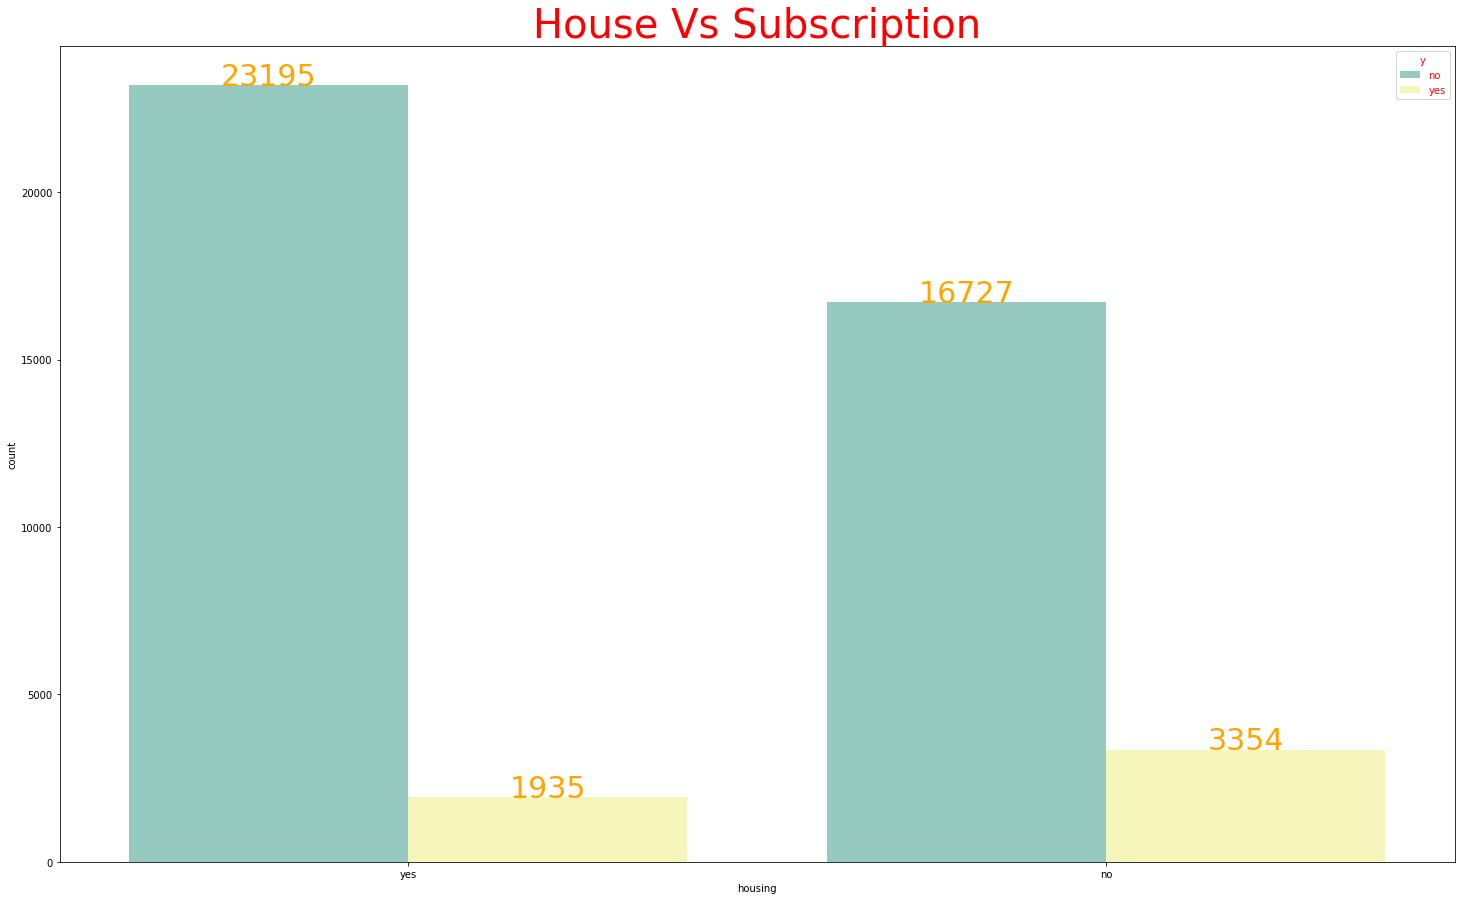

In [68]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'housing', hue='y', data= full_bank, palette= ("Set3"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("House Vs Subscription", fontsize = 40, color= 'red')

Text(0.5, 1.0, 'Contact Vs Subscription')

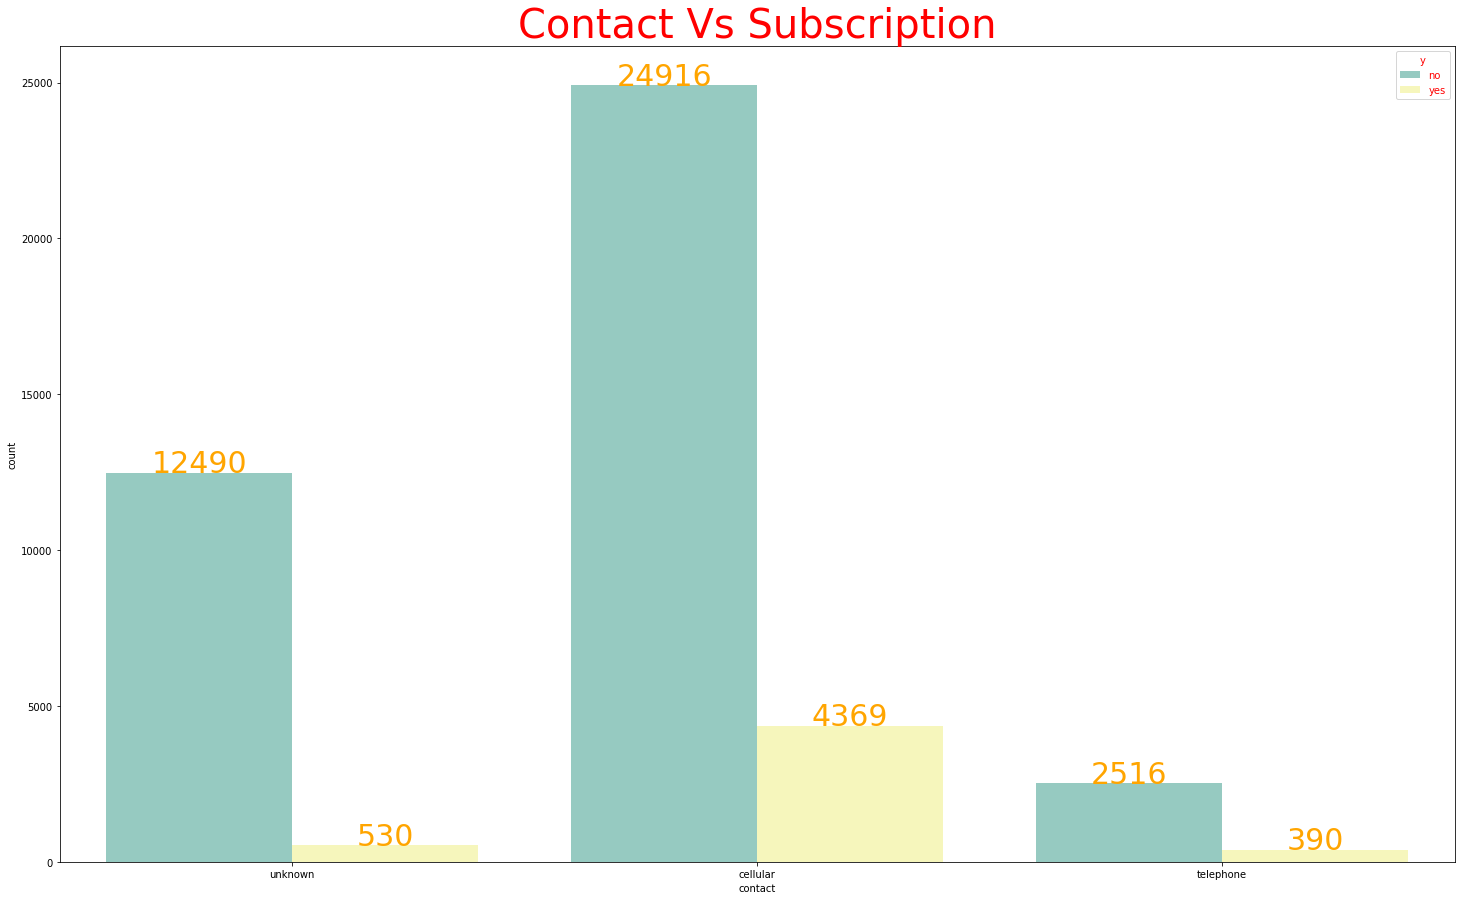

In [69]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'contact', hue='y', data= full_bank, palette= ("Set3"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("Contact Vs Subscription", fontsize = 40, color= 'red')

Those with Cell Phone have more subscription than others

In [70]:

mean_y = full_bank[full_bank['y'] == 'yes']['duration'].median()
mean_n = full_bank[full_bank['y'] == 'no']['duration'].median()


In [71]:
print(' Mean Duration of clients having policy:',mean_y,'\n','Mean Duration of clients do not have policy:',mean_n)

 Mean Duration of clients having policy: 426.0 
 Mean Duration of clients do not have policy: 164.0


Text(0.5, 1.0, 'Education Vs Subscription')

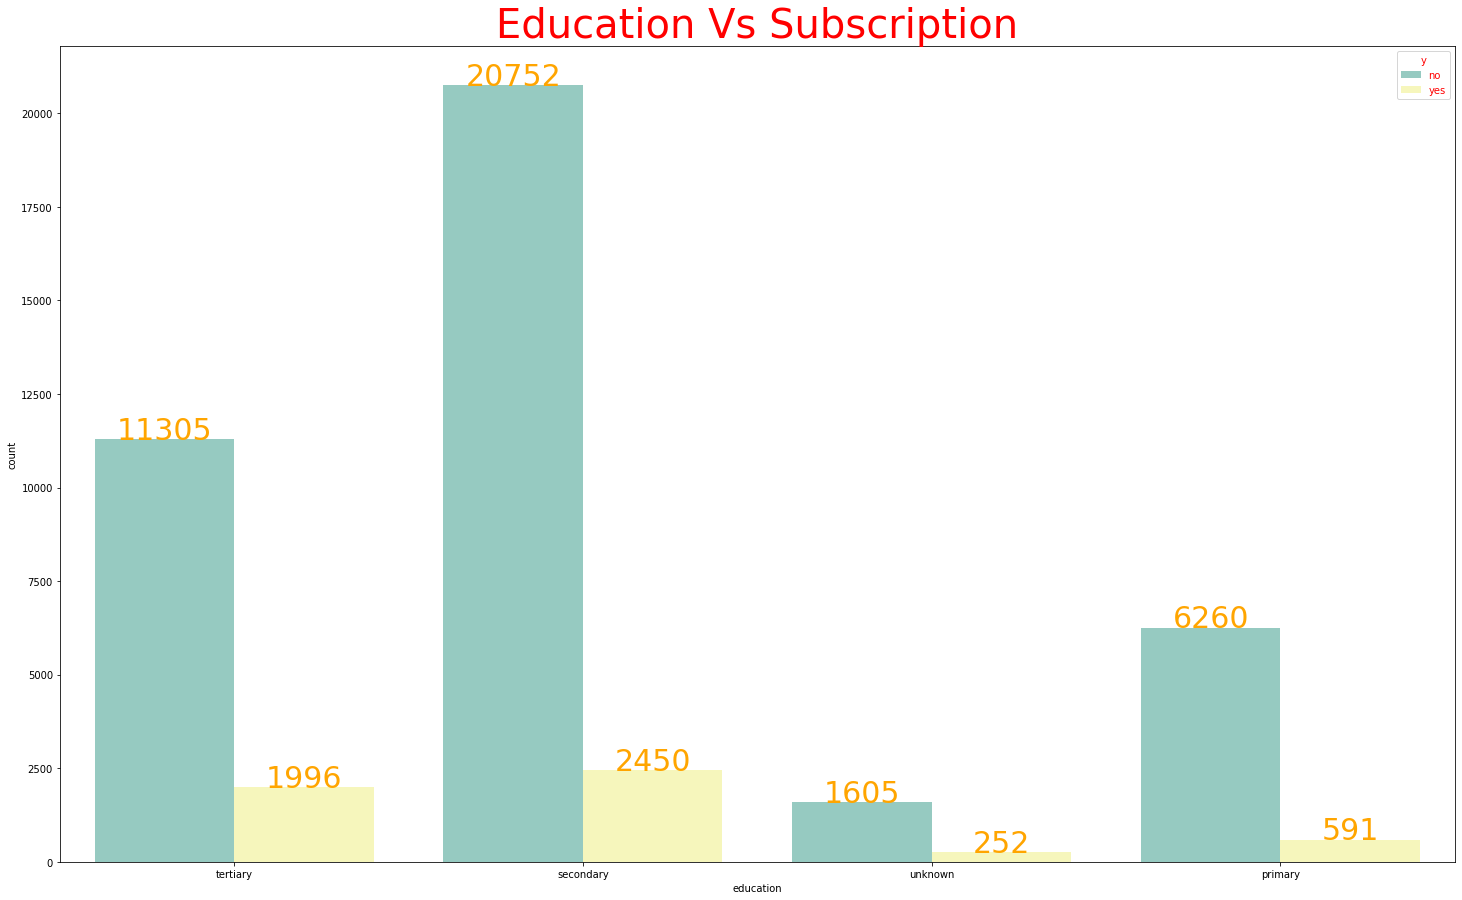

In [72]:
fig = matplt.figure(figsize=(25,15))
block = sea.countplot(x = 'education', hue='y', data= full_bank, palette= ("Set3"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'orange',size=30)
block.set_title("Education Vs Subscription", fontsize = 40, color= 'red')

Those in the Secondary are more than others in term of subscription

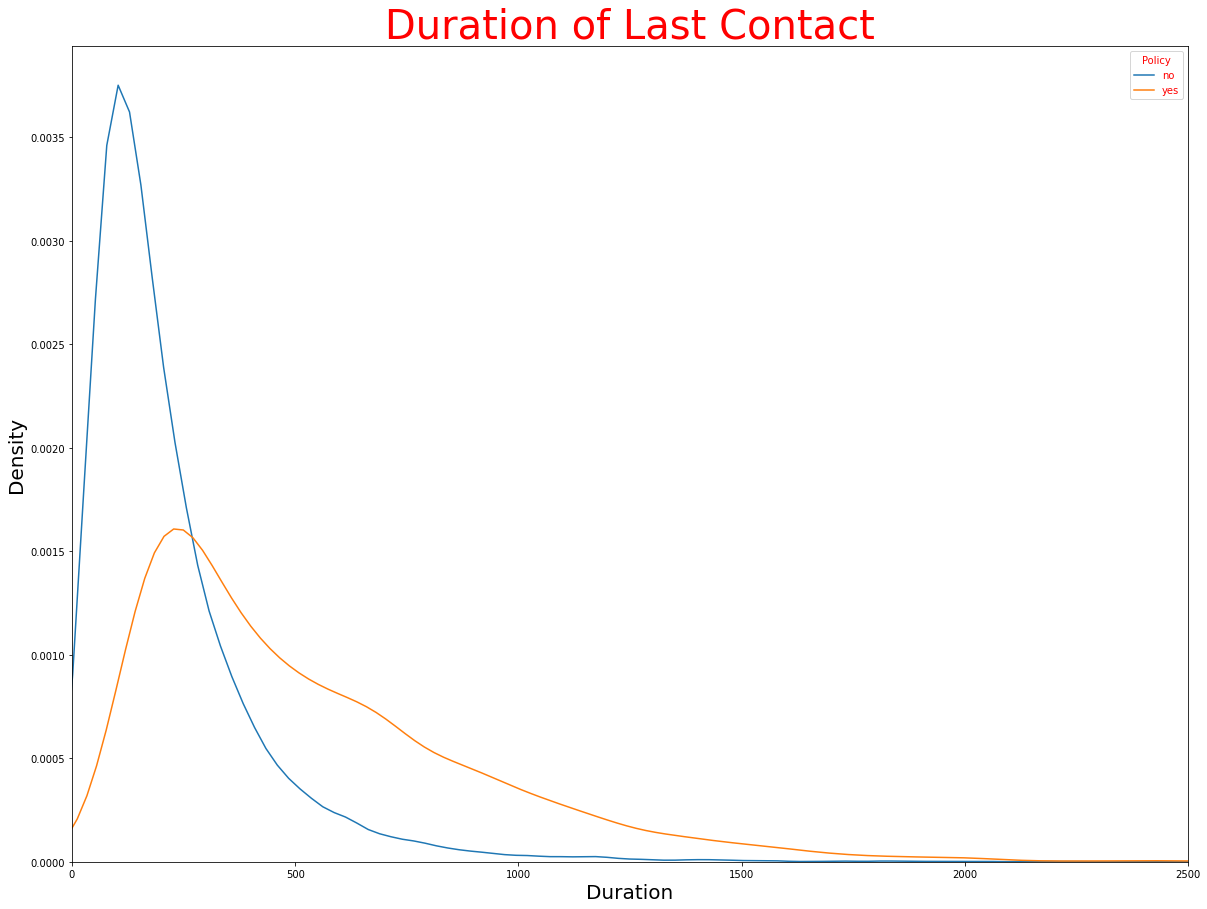

In [73]:
figure = matplt.figure(figsize=(20,15))
sea.kdeplot(full_bank.loc[full_bank['y'] == 'no', 'duration'], label = 'no',palette= 'Set3')
sea.kdeplot(full_bank.loc[full_bank['y'] == 'yes', 'duration'], label = 'yes',palette= 'Set3')
matplt.rcParams.update({'text.color':"red"})
matplt.xlabel('Duration',fontsize= 20)
matplt.ylabel('Density', fontsize=20)
matplt.title('Duration of Last Contact', fontsize = 40)
matplt.xlim(0,2500)
matplt.legend(title = 'Policy')

Text(0.5, 1.0, '# Contacts performed during Campaign and Subscription')

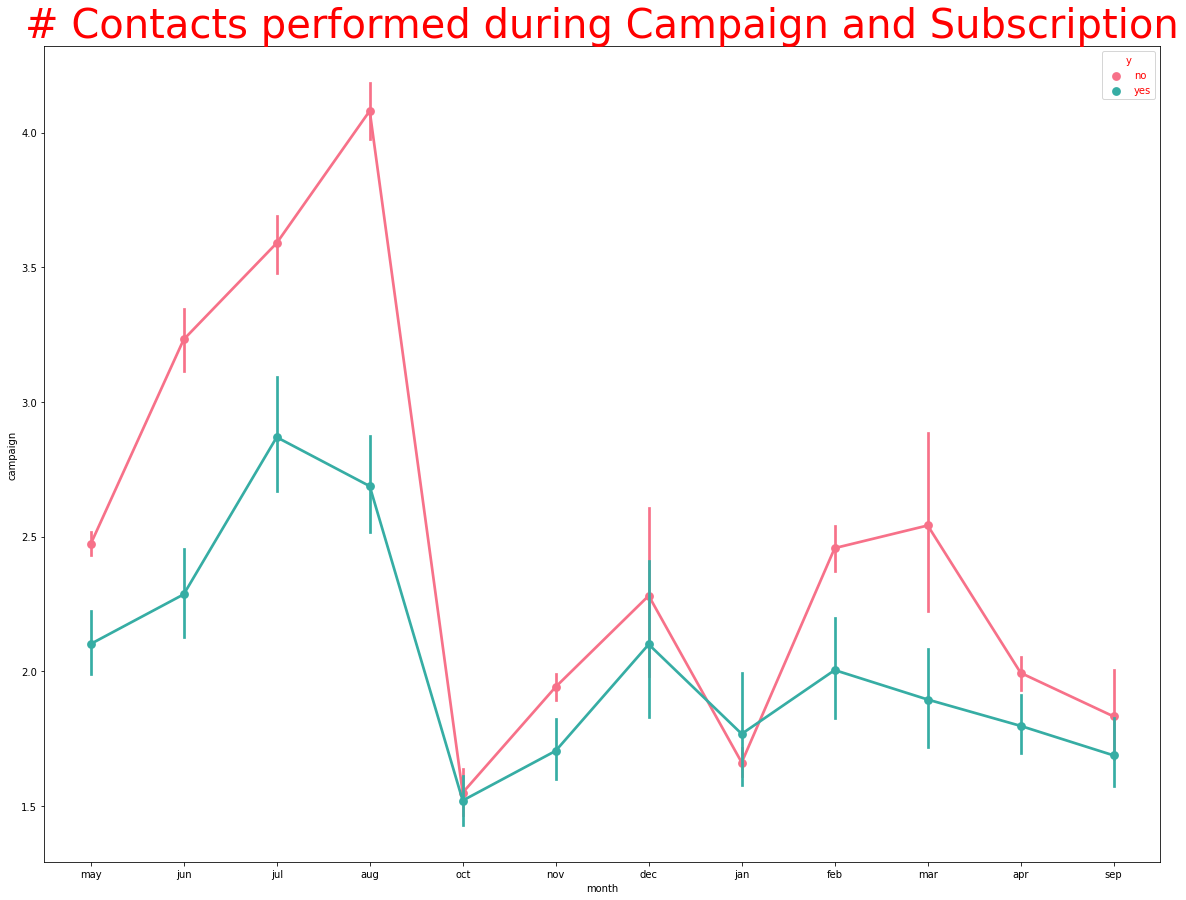

In [74]:

matplt.figure(figsize = (20,15))
sea.pointplot(data = full_bank, x = 'month',y = 'campaign',hue = 'y',palette = 'husl')
matplt.rcParams.update({'text.color':"red"})
matplt.title('# Contacts performed during Campaign and Subscription',fontsize = 40)

Text(0.5, 1.0, '# Contacts performed before Campaign and Subscription')

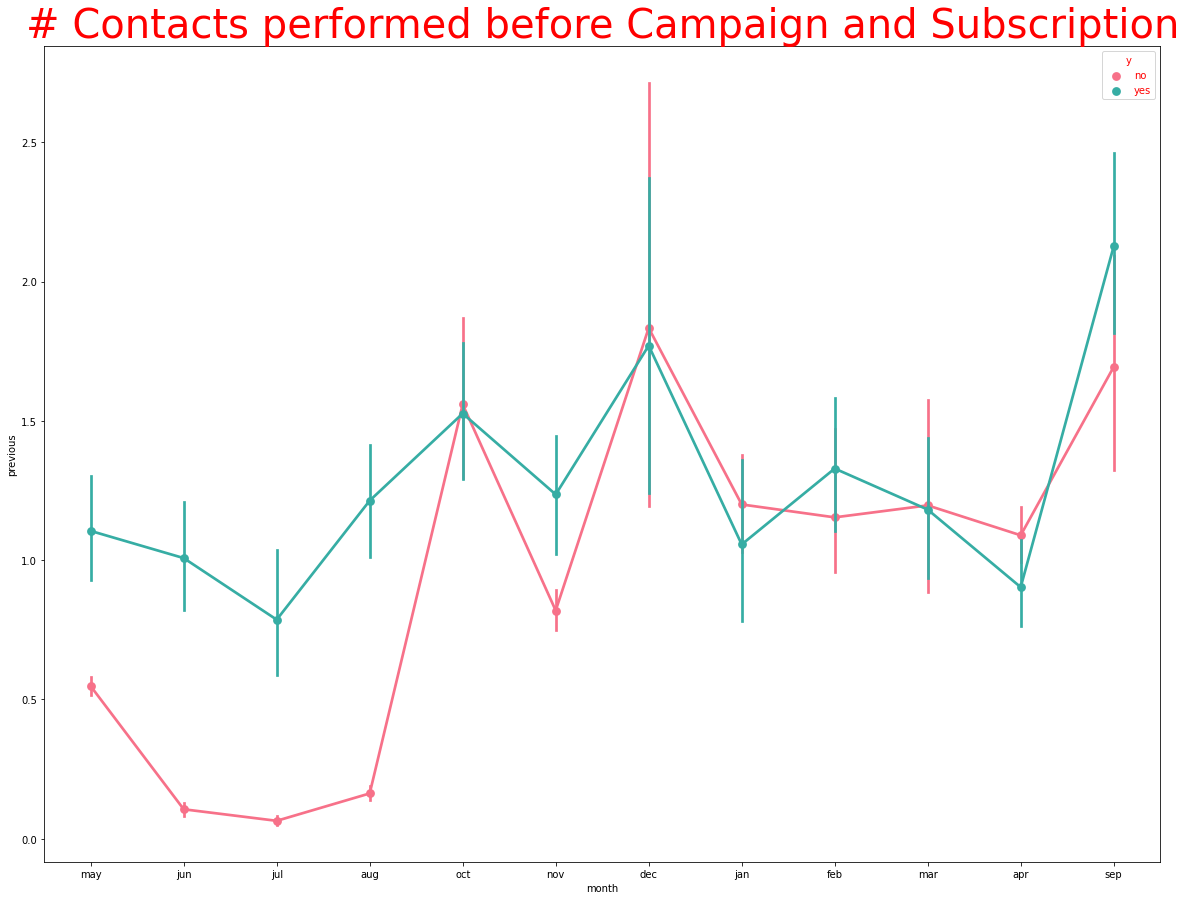

In [75]:
matplt.figure(figsize=(20,15))
sea.pointplot(data= full_bank, x = 'month', y='previous', hue = 'y', palette ="husl")
matplt.rcParams.update({'text.color':"red"})
matplt.title("# Contacts performed before Campaign and Subscription", fontsize= 40)


## FINAL RECOMMENDATIONS



	The following are the final recommendation that is finalized after implying the EDA on the Bank data set file;

##### Note: The word “ Those” refers to "clients".

    I. Those Retired are more likely to buy policy than others
    II. Those who are between age 20-50 are more likely those who bought the policy and also there are those above 70 also have opted the policy.
    III. Those Married are more likely to buy between the age of 60 – 80.
    IV. Those without “no” as their option in default column are more likely to buy the policy.
    V. Those who are in management section are more likely to get the policy
    VI. Those in the Secondary are more than others in term of subscription.
    VII. Those who will most likely opt for policy are between the month of may – October as well as September.
    Moreover the contacts before the campaign brings more clients.
    VIII. Those with the cell-phones have higher rate of subscription than those with none and telephone.
    IX. There is an average of 426 seconds for those who opt the policy and for those who did not where the call lasted for
    146 seconds which is fewer than those who opt for the policy. Although they spend more time on the communication when they opt for the policy.
    X. Those with “no”  in their default and more likely between the age of 20-60 years old.